In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import glob

/var/folders/n2/2ylyphqd4kn_p5jffcftqyg00000gn/T/ipykernel_2588/48660928.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-01-21 11:35:18.452991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import glob

/var/folders/n2/2ylyphqd4kn_p5jffcftqyg00000gn/T/ipykernel_2588/48660928.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-01-21 11:35:18.452991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_data = 'dataset'
pd.DataFrame(os.listdir(image_data), columns = ['Files_Name'])

,Files_Name
0,Happy
1,Sad
2,Surprise
3,Neutral
4,Ahegao
5,Angry


In [3]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pd.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,dataset/Happy/0bde4268785ef2f9da9c720e1c4b2ad8...,Happy
1,dataset/Neutral/0af325e4c7764b2643c51b886b935d...,Neutral
2,dataset/Ahegao/lol619~ahegao.png,Ahegao
3,dataset/Sad/0d5dcbed58ebfa58ff2424c86cbd984197...,Sad
4,dataset/Neutral/0f6a09094c106d74fdd6d43e7ce574...,Neutral
...,...,...
15448,dataset/Neutral/0fc4a33eeb3c12daac9bcb66270a05...,Neutral
15449,dataset/Happy/0c131ddbbd890151928650e32f15a74a...,Happy
15450,dataset/Neutral/1adde9e755c7bf3c9ed00ef70fd269...,Neutral
15451,dataset/Sad/cropped_emotions.141997.png,Sad


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Happy'),
  Text(1, 0, 'Neutral'),
  Text(2, 0, 'Ahegao'),
  Text(3, 0, 'Sad'),
  Text(4, 0, 'Angry'),
  Text(5, 0, 'Surprise')])

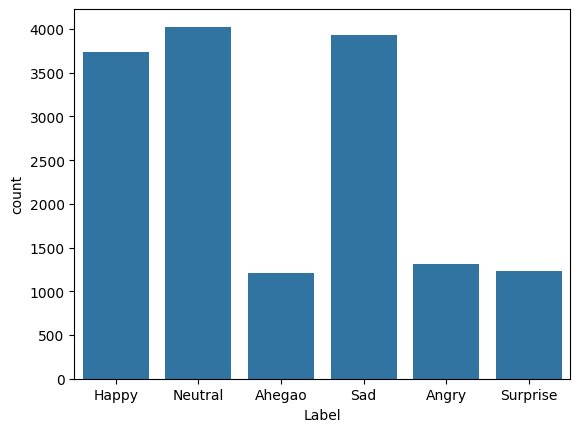

In [4]:
sns.countplot(x = dataframe["Label"])
plt.xticks(rotation = 0)

In [5]:
train_data_dir = image_data
batch_size = 64
target_size = (224,224)
validation_split = 0.2

train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split = validation_split,
    subset = "training",
    seed = 100,
    image_size = target_size,
    batch_size = batch_size,
)

validation = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split = validation_split,
    subset = "validation",
    seed = 200,
    image_size = target_size,
    batch_size = batch_size,
)

Found 15453 files belonging to 6 classes.
Using 12363 files for training.
Found 15453 files belonging to 6 classes.
Using 3090 files for validation.


In [6]:
train_size = len(train)
validation_size = len(validation)
total = train_size + validation_size

print(f'train samples count:\t\t{train_size}\t({(100 * train_size/total):.2f}%)')
print(f'validation samples count:\t{validation_size}\t({(100 * validation_size/total):.2f}%)')
print('================================================')
print(f'Total:\t\t\t\t{total}\t({(100 * total/total):.2f}%)')

train samples count:		194	(79.84%)
validation samples count:	49	(20.16%)
Total:				243	(100.00%)


In [7]:
class_names = train.class_names
class_names

['Ahegao', 'Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

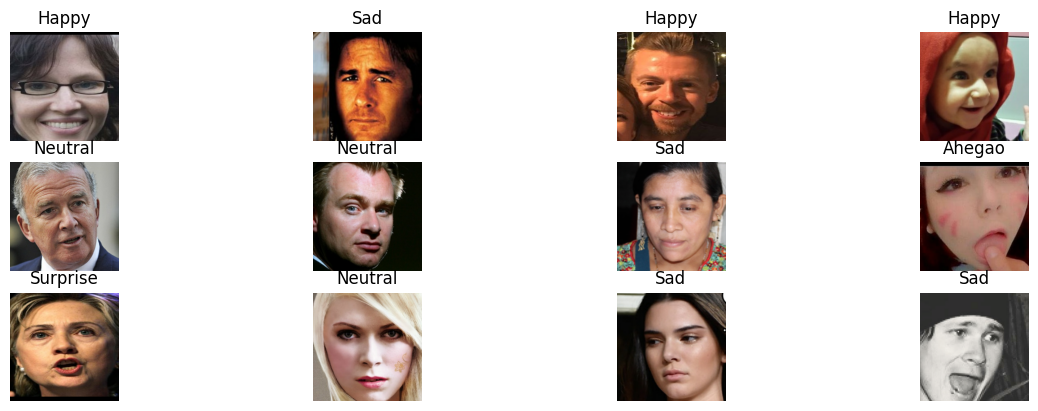

In [8]:
plt.figure(figsize = (15, 20))
for images, labels in train.take(1):
    for i in range(12):
        ax = plt.subplot(12, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
base_model = tf.keras.applications.EfficientNetV2M(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(6,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-m (Function  (None, 7, 7, 1280)        53150388  
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 6)                 376326    
                                                                 
Total params: 53526714 (204.19 MB)
Trainable params: 376326 (1.44 MB)
Non-trainable params: 53150388 (202.75 MB)
_________________________________________________________________


In [10]:
checkpoint = ModelCheckpoint("my_keras_model.h5", save_best_only = True)

In [11]:
early_stopping = EarlyStopping(patience = 5, restore_best_weights = True)

In [12]:
keras_model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hist = keras_model.fit(train, epochs = 40, validation_data = validation, callbacks = [checkpoint, early_stopping])

Epoch 1/40
194/194 [==============================] - ETA: 0s - loss: 2.2073 - accuracy: 0.5448

/Users/andrey/PycharmProjects/facial_emotion_recongnizer/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


194/194 [==============================] - 1465s 7s/step - loss: 2.2073 - accuracy: 0.5448 - val_loss: 1.3138 - val_accuracy: 0.7023
Epoch 2/40
194/194 [==============================] - 1465s 8s/step - loss: 1.7234 - accuracy: 0.6589 - val_loss: 1.0302 - val_accuracy: 0.7621
Epoch 3/40
194/194 [==============================] - 1485s 8s/step - loss: 1.5000 - accuracy: 0.7003 - val_loss: 1.0349 - val_accuracy: 0.7715
Epoch 4/40
194/194 [==============================] - 1473s 8s/step - loss: 1.4829 - accuracy: 0.7309 - val_loss: 1.2372 - val_accuracy: 0.7631
Epoch 5/40
194/194 [==============================] - 1446s 7s/step - loss: 1.3727 - accuracy: 0.7462 - val_loss: 0.7937 - val_accuracy: 0.8320
Epoch 6/40
194/194 [==============================] - 1441s 7s/step - loss: 1.3332 - accuracy: 0.7554 - val_loss: 0.7544 - val_accuracy: 0.8447
Epoch 7/40
194/194 [==============================] - 1455s 8s/step - loss: 1.3799 - accuracy: 0.7649 - val_loss: 0.7901 - val_accuracy: 0.8450
Epo

In [13]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

49/49 [==============================] - 265s 5s/step - loss: 0.7289 - accuracy: 0.8644
Test Loss = 0.7289206385612488
Test Accuracy = 0.8644012808799744


In [14]:
print(train_size)

194


In [15]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.207337,0.544771,1.313828,0.702265
1,1.723436,0.658902,1.030157,0.762136
2,1.500018,0.700315,1.034883,0.771521
3,1.482851,0.730891,1.237213,0.763107
4,1.372698,0.746178,0.793729,0.832039
5,1.333250,0.755399,0.754395,0.844660
6,1.379919,0.764863,0.790109,0.844984
7,1.311360,0.778128,0.784103,0.852104
8,1.377790,0.775459,0.728921,0.864401
9,1.331852,0.787026,0.962926,0.842718


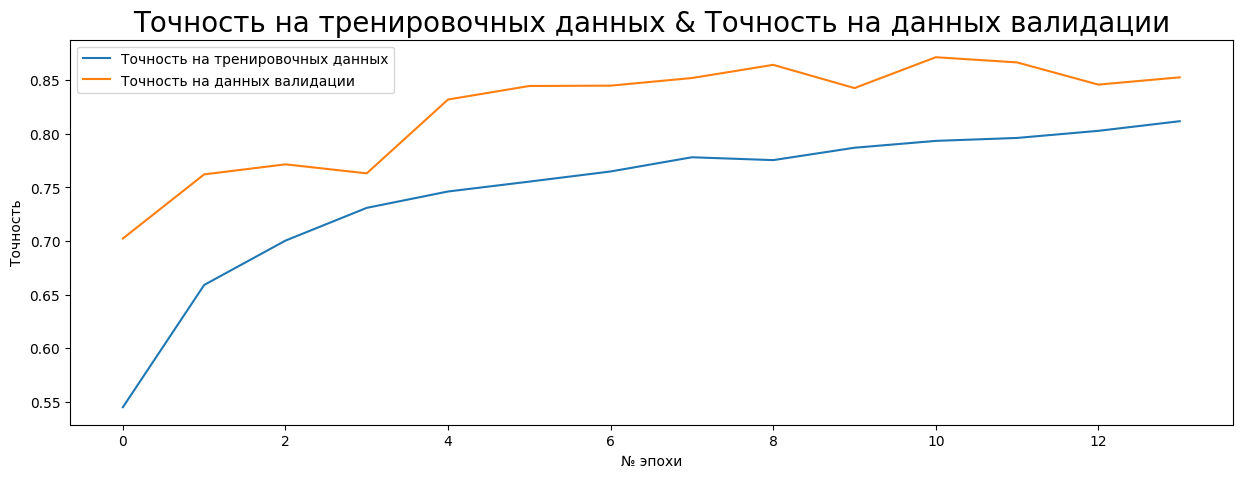

In [21]:
plt.figure(figsize=(15,5))
plt.plot(hist_['accuracy'],label='Точность на тренировочных данных')
plt.plot(hist_['val_accuracy'],label='Точность на данных валидации')
plt.title('Точность на тренировочных данных & Точность на данных валидации',fontsize=20)
plt.xlabel('№ эпохи')
plt.ylabel('Точность')
plt.legend()